In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def foward(self,input):
        pass

    def backward(self,output_gradient,learning_rate):
        pass


In [3]:
class Dense(Layer):
    def __init__(self,input_size,output_size):
        self.weights = np.random.randn(output_size,input_size)
        self.bias = np.random.randn(output_size,1)

    def foward(self, input):
        self.input = input
        return np.dot(self.weights,self.input) + self.bias
    
    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient,self.input.T)
        self.weights -= learning_rate*weights_gradient
        self.bias -= learning_rate*output_gradient
        return np.dot(self.weights.T,output_gradient)

class Activation(Layer):
    def __init__(self,activation,acticvation_prime):
        self.activation = activation
        self.activation_prime = acticvation_prime

    def foward(self, input):
        self.input = input
        return self.activation(self.input)
    
    def backward(self,output_gradient, learningRate):
        return np.multiply(output_gradient,self.activation_prime(self.input))


class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1- np.tanh(x)**2
        super().__init__(tanh,tanh_prime)


In [4]:
def mse(y_true,y_pred):
    return np.mean(np.power(y_true-y_pred,2))

def mse_prime(y_true,y_pred):
    return 2*(y_pred-y_true)/np.size(y_true)


In [5]:
X = np.reshape([[0,0],[0,1],[1,0],[1,1]],(4,2,1))
Y = np.reshape([[0],[1],[1],[0]],(4,1,1))


network = [
    Dense(2,3),
    Tanh(),
    Dense(3,1),
    Tanh()
    ]

epochs = 10000
learning_rate = 0.1


for e in range(epochs):
    error = 0
    for x,y in zip(X,Y):
        output = x
        for layer in network:
            output = layer.foward(output)
            
        error += mse(y,output)

        grad = mse_prime(y,output)
        for layer in reversed(network):
            grad = layer.backward(grad,learning_rate)

    error /= len(X)
    print(f'{e+1}/{epochs}, error = {error}')

1/10000, error = 0.33594777790840524
2/10000, error = 0.32642590308362096
3/10000, error = 0.32024411676675146
4/10000, error = 0.3135220188518849
5/10000, error = 0.3063271644934868
6/10000, error = 0.29880868761250906
7/10000, error = 0.2911419936371623
8/10000, error = 0.28352170733407445
9/10000, error = 0.2761408227570343
10/10000, error = 0.2691655088997832
11/10000, error = 0.2627157441260717
12/10000, error = 0.2568575467176408
13/10000, error = 0.25160695943062994
14/10000, error = 0.2469417380091704
15/10000, error = 0.2428154759796077
16/10000, error = 0.23917017450960598
17/10000, error = 0.23594540887696477
18/10000, error = 0.23308395442493074
19/10000, error = 0.23053460000169754
20/10000, error = 0.22825307611194426
21/10000, error = 0.22620188736044408
22/10000, error = 0.22434960606349041
23/10000, error = 0.2226699735995968
24/10000, error = 0.22114100290832073
25/10000, error = 0.21974417647458336
26/10000, error = 0.2184637750878719
27/10000, error = 0.217286339979

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


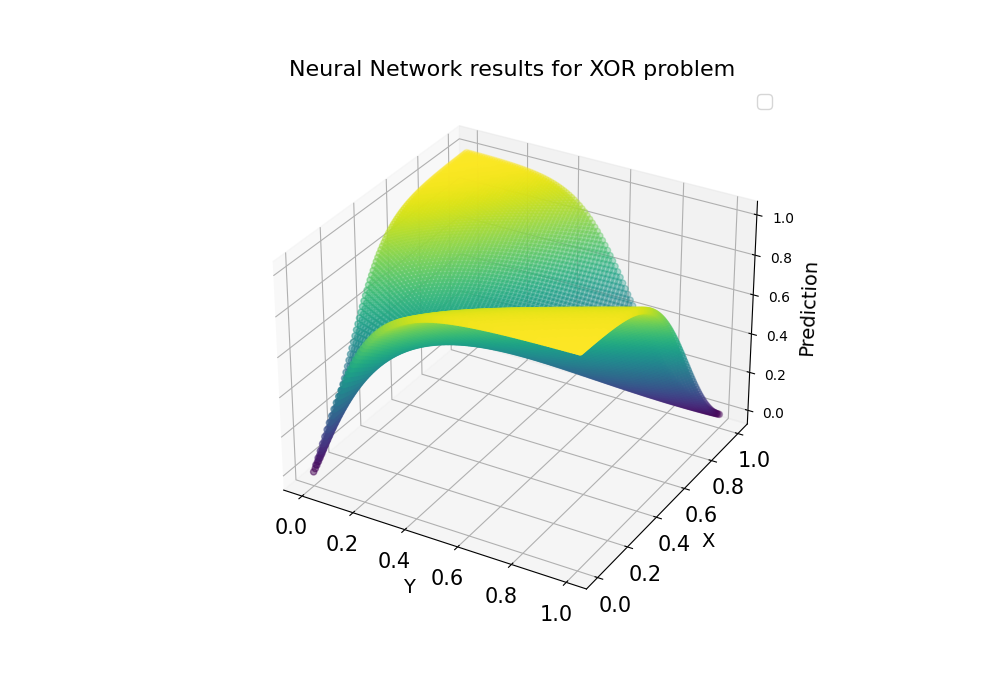

In [20]:
%matplotlib widget
v_x = np.linspace(0,1,100)
v_y = np.linspace(0,1,100)
entriesx = np.zeros(100*100)
entriesy = np.zeros(100*100)
entries = np.empty(100*100, dtype=object)

results = np.zeros(100*100)

for i_x,x in enumerate(v_x):
    for i_y,y in  enumerate(v_y):
        entriesx[i_x*100+i_y] = x
        entriesy[i_x*100+i_y] = y
        entries[i_x*100+i_y] = [[x],[y]]


for i,entrie in enumerate(entries):
    output = entrie
    for layer in network:
        output = layer.foward(output)
    results[i] = output


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(entriesx, entriesy, results, c=results, cmap='viridis')
ax.set_title('Neural Network results for XOR problem', fontsize=16)
plt.legend(fontsize = 14)
ax.set_ylabel('X', fontsize=14)
ax.set_xlabel('Y', fontsize=14)
ax.set_zlabel("Prediction",fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

In [19]:
np.arange(6).reshape(2,3).reshape(6)

array([0, 1, 2, 3, 4, 5])